In [1]:
import warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

## Loading and processing data

In [2]:
df = pd.read_csv('AirPassengers.csv')

In [3]:
df['Month'] = pd.to_datetime(df['Month'])

In [4]:
df.head()

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [5]:
y = pd.Series(data=df['#Passengers'].values, index=df['Month'])

In [6]:
y.head()

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
dtype: int64

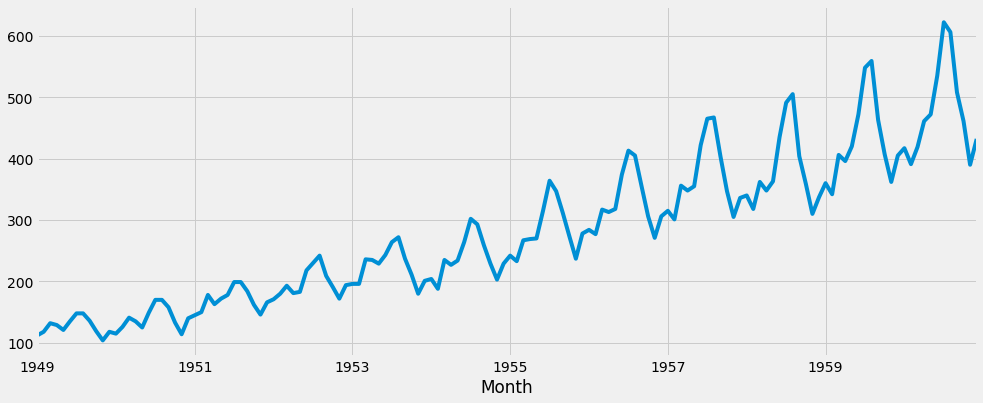

In [7]:
y.plot(figsize=(15, 6))
plt.show()

## Gridsearch for  p,q and d parameters

In [8]:
# Define the p, d and q parameters to take any value between 0 and 3
p = d = q = range(0, 3)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [9]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

best_result = [0, 0, 10000000]
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()
            
            print('ARIMA{} x {} - AIC: {}'.format(param, param_seasonal, results.aic))

            if results.aic < best_result[2]:
                best_result = [param, param_seasonal, results.aic]
        except:
            continue
            
print('\n Best Result:', best_result)

ARIMA(0, 0, 0) x (0, 0, 0, 12) - AIC: 2044.4329486427587
ARIMA(0, 0, 0) x (0, 0, 1, 12) - AIC: 1887.1493782738871
ARIMA(0, 0, 0) x (0, 0, 2, 12) - AIC: 1498.2861799968266
ARIMA(0, 0, 0) x (0, 1, 0, 12) - AIC: 1315.9211929474204
ARIMA(0, 0, 0) x (0, 1, 1, 12) - AIC: 1156.291490150852
ARIMA(0, 0, 0) x (0, 1, 2, 12) - AIC: 1016.136279733789
ARIMA(0, 0, 0) x (0, 2, 0, 12) - AIC: 1103.8641596230023
ARIMA(0, 0, 0) x (0, 2, 1, 12) - AIC: 942.1856088448575
ARIMA(0, 0, 0) x (0, 2, 2, 12) - AIC: 834.3017303458549
ARIMA(0, 0, 0) x (1, 0, 0, 12) - AIC: 1118.6259190717344
ARIMA(0, 0, 0) x (1, 0, 1, 12) - AIC: 1107.2562043238856
ARIMA(0, 0, 0) x (1, 0, 2, 12) - AIC: 1014.6452265988248
ARIMA(0, 0, 0) x (1, 1, 0, 12) - AIC: 1109.2437994445115
ARIMA(0, 0, 0) x (1, 1, 1, 12) - AIC: 1033.61721667297
ARIMA(0, 0, 0) x (1, 1, 2, 12) - AIC: 904.4213211125851
ARIMA(0, 0, 0) x (1, 2, 0, 12) - AIC: 974.4396269851046
ARIMA(0, 0, 0) x (1, 2, 1, 12) - AIC: 940.2370895732583
ARIMA(0, 0, 0) x (1, 2, 2, 12) - AIC: 83

ARIMA(0, 1, 2) x (1, 0, 2, 12) - AIC: 900.1407480715075
ARIMA(0, 1, 2) x (1, 1, 0, 12) - AIC: 936.7822150379475
ARIMA(0, 1, 2) x (1, 1, 1, 12) - AIC: 915.1111429658582
ARIMA(0, 1, 2) x (1, 1, 2, 12) - AIC: 820.9921775699333
ARIMA(0, 1, 2) x (1, 2, 0, 12) - AIC: 871.3719829151097
ARIMA(0, 1, 2) x (1, 2, 1, 12) - AIC: 824.0789557986361
ARIMA(0, 1, 2) x (1, 2, 2, 12) - AIC: 728.3909654378588
ARIMA(0, 1, 2) x (2, 0, 0, 12) - AIC: 918.4251433141288
ARIMA(0, 1, 2) x (2, 0, 1, 12) - AIC: 920.0741266322588
ARIMA(0, 1, 2) x (2, 0, 2, 12) - AIC: 896.4411961372954
ARIMA(0, 1, 2) x (2, 1, 0, 12) - AIC: 849.1077294091832
ARIMA(0, 1, 2) x (2, 1, 1, 12) - AIC: 850.814323475467
ARIMA(0, 1, 2) x (2, 1, 2, 12) - AIC: 822.9785228670198
ARIMA(0, 1, 2) x (2, 2, 0, 12) - AIC: 770.166571906804
ARIMA(0, 1, 2) x (2, 2, 1, 12) - AIC: 754.8857807880337
ARIMA(0, 1, 2) x (2, 2, 2, 12) - AIC: 729.0187073247682
ARIMA(0, 2, 0) x (0, 0, 0, 12) - AIC: 1441.350743331749
ARIMA(0, 2, 0) x (0, 0, 1, 12) - AIC: 1243.6526185

ARIMA(1, 0, 1) x (2, 1, 2, 12) - AIC: 839.2558089793436
ARIMA(1, 0, 1) x (2, 2, 0, 12) - AIC: 767.1156376894991
ARIMA(1, 0, 1) x (2, 2, 1, 12) - AIC: 752.2884897802284
ARIMA(1, 0, 1) x (2, 2, 2, 12) - AIC: 746.2099137641417
ARIMA(1, 0, 2) x (0, 0, 0, 12) - AIC: 1381.5217419604994
ARIMA(1, 0, 2) x (0, 0, 1, 12) - AIC: 1282.7289463042118
ARIMA(1, 0, 2) x (0, 0, 2, 12) - AIC: 1036.585404669964
ARIMA(1, 0, 2) x (0, 1, 0, 12) - AIC: 1009.2881584893775
ARIMA(1, 0, 2) x (0, 1, 1, 12) - AIC: 923.3041353898857
ARIMA(1, 0, 2) x (0, 1, 2, 12) - AIC: 836.4811525975886
ARIMA(1, 0, 2) x (0, 2, 0, 12) - AIC: 993.8462787290941
ARIMA(1, 0, 2) x (0, 2, 1, 12) - AIC: 832.6688985549373
ARIMA(1, 0, 2) x (0, 2, 2, 12) - AIC: 731.8305271450979
ARIMA(1, 0, 2) x (1, 0, 0, 12) - AIC: 1010.7058013458541
ARIMA(1, 0, 2) x (1, 0, 1, 12) - AIC: 984.2779179450101
ARIMA(1, 0, 2) x (1, 0, 2, 12) - AIC: 903.6200387626579
ARIMA(1, 0, 2) x (1, 1, 0, 12) - AIC: 937.696186929897
ARIMA(1, 0, 2) x (1, 1, 1, 12) - AIC: 929.569

ARIMA(1, 2, 1) x (0, 2, 2, 12) - AIC: 729.7922161265186
ARIMA(1, 2, 1) x (1, 0, 0, 12) - AIC: 1073.459492019701
ARIMA(1, 2, 1) x (1, 0, 1, 12) - AIC: 989.1843745203084
ARIMA(1, 2, 1) x (1, 0, 2, 12) - AIC: 907.8028836295305
ARIMA(1, 2, 1) x (1, 1, 0, 12) - AIC: 926.4582272211329
ARIMA(1, 2, 1) x (1, 1, 1, 12) - AIC: 918.454919126897
ARIMA(1, 2, 1) x (1, 1, 2, 12) - AIC: 831.7807386453692
ARIMA(1, 2, 1) x (1, 2, 0, 12) - AIC: 860.6840937765279
ARIMA(1, 2, 1) x (1, 2, 1, 12) - AIC: 835.2565864867199
ARIMA(1, 2, 1) x (1, 2, 2, 12) - AIC: 731.8080448150029
ARIMA(1, 2, 1) x (2, 0, 0, 12) - AIC: 912.2132872814198
ARIMA(1, 2, 1) x (2, 0, 1, 12) - AIC: 914.2073738163032
ARIMA(1, 2, 1) x (2, 0, 2, 12) - AIC: 905.7017500918015
ARIMA(1, 2, 1) x (2, 1, 0, 12) - AIC: 839.1221340834944
ARIMA(1, 2, 1) x (2, 1, 1, 12) - AIC: 839.2664443871373
ARIMA(1, 2, 1) x (2, 1, 2, 12) - AIC: 833.7807298945409
ARIMA(1, 2, 1) x (2, 2, 0, 12) - AIC: 759.6238190450247
ARIMA(1, 2, 1) x (2, 2, 1, 12) - AIC: 749.7300738

ARIMA(2, 1, 0) x (2, 0, 2, 12) - AIC: 904.6606815920964
ARIMA(2, 1, 0) x (2, 1, 0, 12) - AIC: 834.1388958373092
ARIMA(2, 1, 0) x (2, 1, 1, 12) - AIC: 836.1266432340535
ARIMA(2, 1, 0) x (2, 1, 2, 12) - AIC: 830.116460199812
ARIMA(2, 1, 0) x (2, 2, 0, 12) - AIC: 753.6967977947572
ARIMA(2, 1, 0) x (2, 2, 1, 12) - AIC: 739.2466159512308
ARIMA(2, 1, 0) x (2, 2, 2, 12) - AIC: 740.038114828029
ARIMA(2, 1, 1) x (0, 0, 0, 12) - AIC: 1361.3857842642556
ARIMA(2, 1, 1) x (0, 0, 1, 12) - AIC: 1168.369052221953
ARIMA(2, 1, 1) x (0, 0, 2, 12) - AIC: 1027.9355068034833
ARIMA(2, 1, 1) x (0, 1, 0, 12) - AIC: 1010.5527120580341
ARIMA(2, 1, 1) x (0, 1, 1, 12) - AIC: 924.4158464337013
ARIMA(2, 1, 1) x (0, 1, 2, 12) - AIC: 847.0867756877878
ARIMA(2, 1, 1) x (0, 2, 0, 12) - AIC: 998.6256173782757
ARIMA(2, 1, 1) x (0, 2, 1, 12) - AIC: 837.5693422037969
ARIMA(2, 1, 1) x (0, 2, 2, 12) - AIC: 732.9767982196032
ARIMA(2, 1, 1) x (1, 0, 0, 12) - AIC: 998.8582676753908
ARIMA(2, 1, 1) x (1, 0, 1, 12) - AIC: 988.25284

# Plotting model stats

In [10]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(best_result[0][0], best_result[0][1], best_result[0][1]),
                                seasonal_order=(best_result[1][0], best_result[1][1], best_result[1][2], best_result[1][3]),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.1856      0.195     -6.092      0.000      -1.567      -0.804
ar.L2         -0.4353      0.099     -4.411      0.000      -0.629      -0.242
ma.L1          0.7787      0.204      3.812      0.000       0.378       1.179
ma.S.L12      -1.4145      0.227     -6.239      0.000      -1.859      -0.970
ma.S.L24       0.4839      0.143      3.381      0.001       0.203       0.764
sigma2       118.5131     28.038      4.227      0.000      63.560     173.466


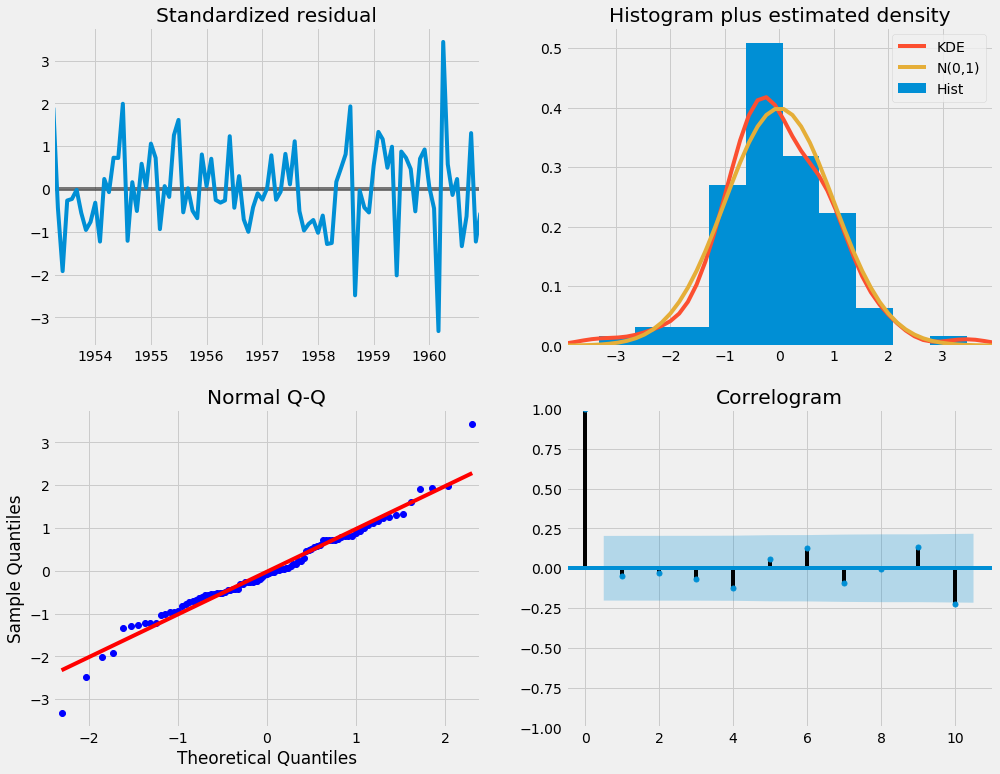

In [11]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

## Plot one-step ahead forecast

In [12]:
pred = results.get_prediction(start=pd.to_datetime('1958-01-01'), dynamic=False)
pred_ci = pred.conf_int()

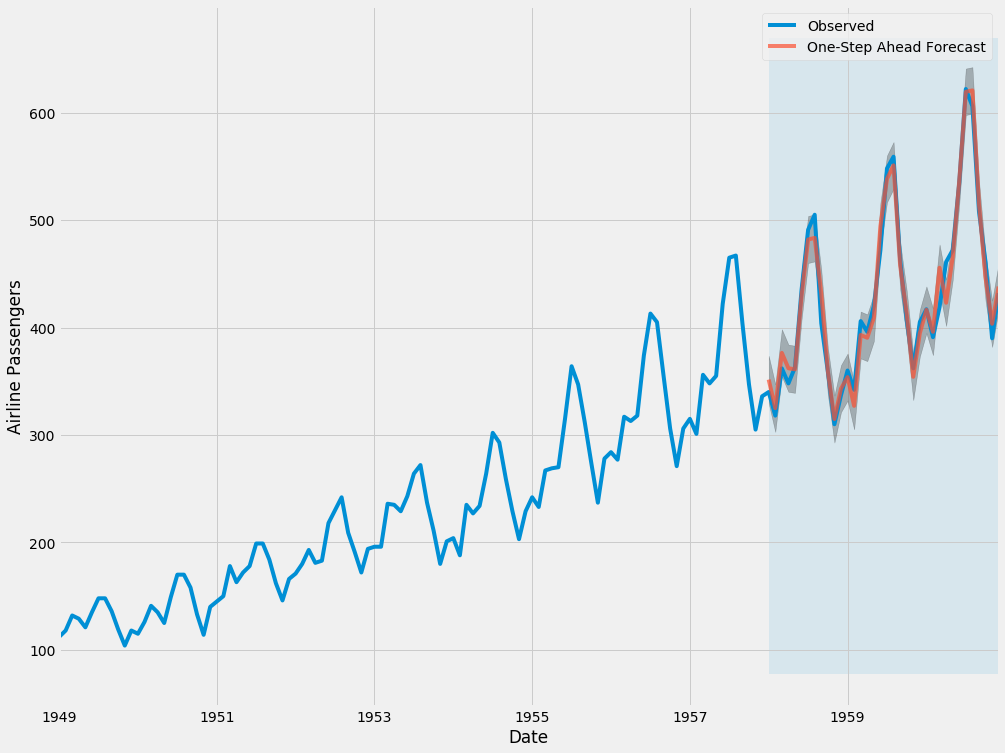

In [13]:
ax = y['1949':].plot(label='Observed', figsize=(15, 12))
pred.predicted_mean.plot(ax=ax, label='One-Step Ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('1958-01-01'), y.index[-1],
                 alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('Airline Passengers')
plt.legend()

plt.show()

In [14]:
# Extract the predicted and true values of our time series
y_forecasted = pred.predicted_mean
y_truth = y['1958-01-01':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 194.81


## Plotting dynamic forecasts

In [15]:
pred_dynamic = results.get_prediction(start=pd.to_datetime('1958-01-01'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

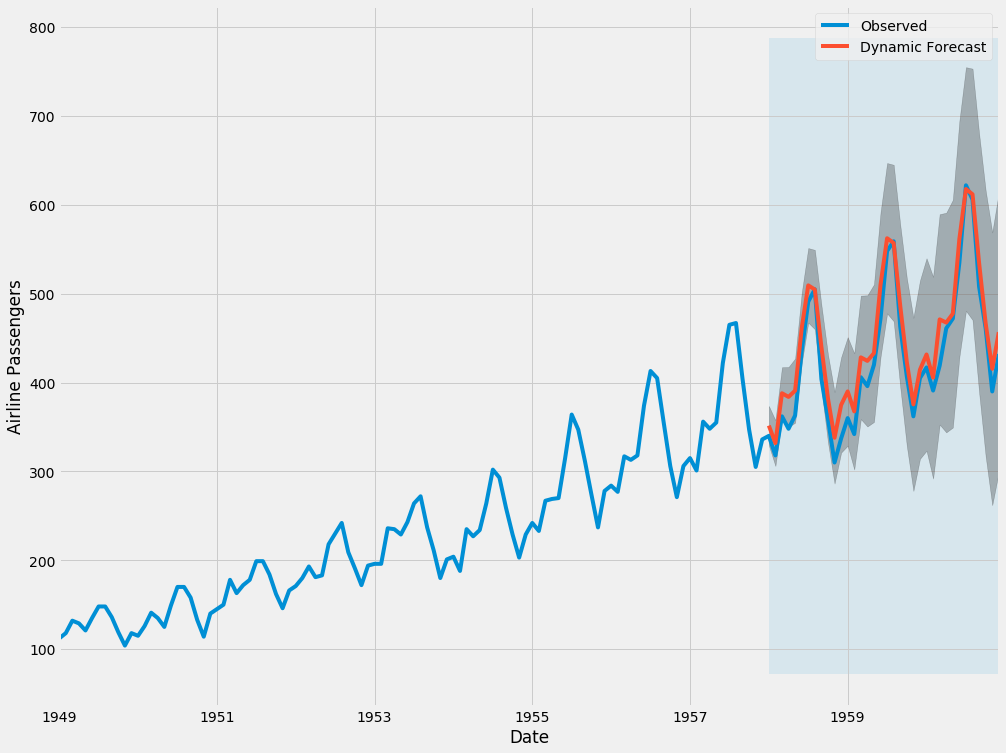

In [16]:
ax = y['1949':].plot(label='Observed', figsize=(15, 12))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], color='k', alpha=.25)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('1958-01-01'), y.index[-1],
                 alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('Airline Passengers')

plt.legend()
plt.show()

In [17]:
# Extract the predicted and true values of our time series
y_forecasted = pred_dynamic.predicted_mean
y_truth = y['1958-01-01':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 551.55


## Potting  2-year forecast

In [18]:
# Get forecast 24 steps ahead in future
pred_uc = results.get_forecast(steps=24)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

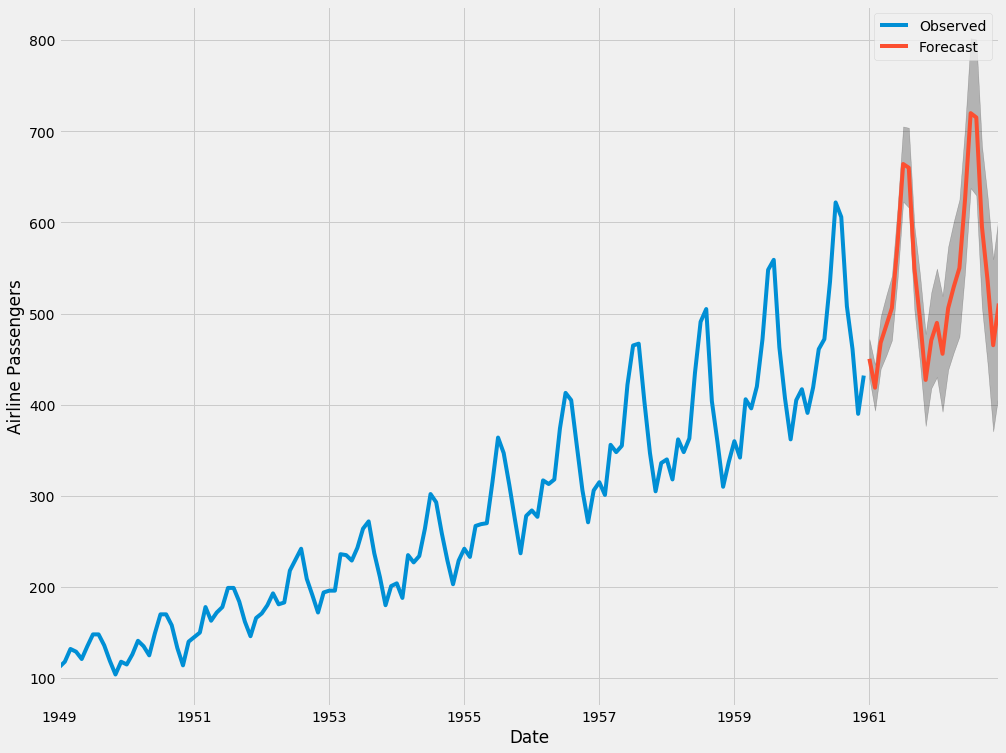

In [19]:
ax = y.plot(label='Observed', figsize=(15, 12))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Airline Passengers')

plt.legend()
plt.show()